In [1]:
from util import *
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def run_single_time_window(monkey, event_want, offset, time_window, spatial_step=3):
    accs = np.zeros((10-spatial_step+1, 10-spatial_step+1))
    all_feat, labels = get_all_feat_and_labels(monkey, event_want, offset, time_window)
    for i in range(1, 10-spatial_step+2):
        for j in range(1, 10-spatial_step+2): 
            elecs = get_electrodes(monkey, i, j, spatial_step)
            data = []
            for ch in elecs:
                if ch == -1: continue
                data.append(all_feat[ch]['st_feat'][:,None])
            if monkey == 'N':
                for ch in elecs:
                    if ch == -1: continue
                    data.append(all_feat[ch]['lfp_feat'])
            data = np.concatenate(data, axis=1)
            train_num=int(0.8*data.shape[0])

            X_train, y_train, X_test, y_test = data[:train_num], labels[:train_num], data[train_num:], labels[train_num:]
            # Normalize data
            scaler = StandardScaler()  # normalization: zero mean, unit variance
            scaler.fit(X_train)  # scaling factor determined from the training set

            X_train = scaler.transform(X_train)
            X_test = scaler.transform(X_test)
#             clf = MLPClassifier(hidden_layer_sizes=(30), learning_rate_init=0.05, max_iter=500, verbose=0)
            clf = SVC(kernel='sigmoid', C=1)
            clf.fit(X_train, y_train)

            accuracy = (clf.predict(X_test) == y_test).mean()
            accs[i-1, j-1] = accuracy
    
    rows,cols = accs.shape

    plt.imshow(accs, interpolation='nearest', 
                     extent=[0.5, 0.5+cols, 0.5, 0.5+rows],
                     cmap='bwr', vmin=0.25, vmax=1)
    plt.colorbar()
    plt.axis('off')
    plt.show()
    return accs
            


In [3]:
accs = run_single_time_window('N', 'SR', -0.2, 0.2, 2)

ValueError: need at least one array to stack

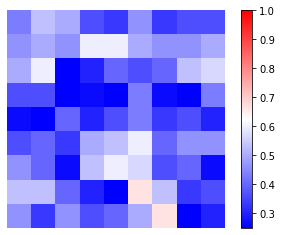

In [10]:
accs = run_single_time_window('L', 'SR', -1, 2, 2)

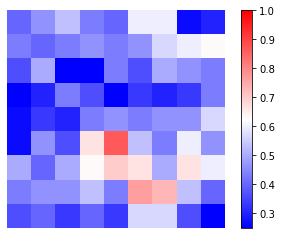

In [71]:
accs = run_single_time_window('L', 'GO-ON', 0.2, 0.5, 2)

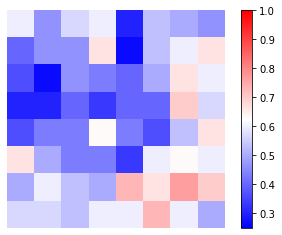

In [39]:
accs = run_single_time_window('L', 'GO-ON', 0.4, 0.5, 3)

In [74]:
monkey = 'L'
event_want = 'GO-ON'
offset = 0.2
time_window = 0.5
spatial_step = 3

all_feat, labels = get_all_feat_and_labels(monkey, event_want, offset, time_window)
i = 6
j = 6
elecs = get_electrodes(monkey, i, j, spatial_step)
data = []
for ch in elecs:
    if ch == -1: continue
    data.append(all_feat[ch]['st_feat'][:,None])
if monkey == 'N':
    for ch in elecs:
        if ch == -1: continue
        data.append(all_feat[ch]['lfp_feat'])
data = np.concatenate(data, axis=1)
train_num=int(0.8*data.shape[0])

X_train, y_train, X_test, y_test = data[:train_num], labels[:train_num], data[train_num:], labels[train_num:]
# Normalize data
scaler = StandardScaler()  # normalization: zero mean, unit variance
scaler.fit(X_train)  # scaling factor determined from the training set

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# clf = MLPClassifier(hidden_layer_sizes=(50), learning_rate_init=0.01, max_iter=500, verbose=0)
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

accuracy = (clf.predict(X_test) == y_test).mean()

In [77]:
# accuracy
# data[train_num:], labels[train_num:]
labels

array(['PGHF', 'SGLF', 'PGHF', 'SGLF', 'SGLF', 'SGLF', 'PGHF', 'SGHF',
       'PGHF', 'PGHF', 'SGHF', 'PGLF', 'PGHF', 'PGHF', 'SGLF', 'SGHF',
       'PGHF', 'PGHF', 'SGLF', 'SGHF', 'PGHF', 'SGLF', 'SGHF', 'PGLF',
       'SGLF', 'SGHF', 'PGLF', 'PGHF', 'SGLF', 'PGHF', 'PGHF', 'SGLF',
       'SGHF', 'SGLF', 'SGHF', 'PGLF', 'SGHF', 'SGLF', 'PGHF', 'SGLF',
       'SGHF', 'SGHF', 'PGHF', 'PGLF', 'SGLF', 'PGHF', 'SGHF', 'SGHF',
       'SGHF', 'SGLF', 'SGHF', 'SGHF', 'SGLF', 'PGLF', 'SGHF', 'SGHF',
       'SGHF', 'PGHF', 'PGHF', 'PGLF', 'SGLF', 'SGLF', 'SGHF', 'PGLF',
       'PGLF', 'PGLF', 'SGLF', 'PGLF', 'PGLF', 'SGHF', 'SGHF', 'SGHF',
       'PGLF', 'SGLF', 'SGLF', 'SGLF', 'SGLF', 'SGHF', 'PGLF', 'PGLF',
       'PGLF', 'SGLF', 'SGHF', 'PGHF', 'SGLF', 'PGHF', 'PGHF', 'PGHF',
       'SGLF', 'SGLF', 'SGLF', 'PGLF', 'PGLF', 'PGHF', 'PGHF', 'SGHF',
       'SGHF', 'PGLF', 'PGHF', 'PGHF', 'SGLF', 'SGHF', 'SGHF', 'PGHF',
       'PGLF', 'SGLF', 'PGHF', 'SGHF', 'SGLF', 'SGHF', 'PGLF', 'SGLF',
      

In [4]:
elecs

[50, 15, 17, 54, 19, 13, 21, 25, 23]

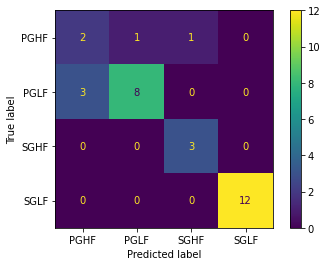

In [75]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)